In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

log = pd.read_csv("../res/csv/grid1.csv")


In [2]:
a = log.drop_duplicates().sort_values(by="loss").reset_index()


In [3]:
a.head(10)


,index,x1,x10,y1,y2,loss
0,79,0,1,0.071189,0.334920,0.011887
1,67,-1,1,-0.068063,0.647574,0.057567
2,92,1,2,0.281773,0.357201,0.083032
3,80,0,2,0.142411,0.669991,0.084033
4,78,0,0,-0.000000,0.000000,0.174306
5,93,1,3,0.353074,0.692429,0.200247
6,91,1,1,0.210505,0.022125,0.200634
7,105,2,3,0.492547,0.379502,0.244046
8,104,2,2,0.421199,0.044270,0.316709
9,68,-1,2,0.003111,0.982640,0.319393


In [4]:
delta = 1

x = np.arange(-6.0, 6.0, delta)
y = np.arange(-6.0, 6.0, delta)
l = len(x)
Z = np.zeros(shape=(l, l))
X, Y = np.meshgrid(x, y)


In [5]:
a

,index,x1,x10,y1,y2,loss
0,79,0,1,0.071189,0.334920,0.011887
1,67,-1,1,-0.068063,0.647574,0.057567
2,92,1,2,0.281773,0.357201,0.083032
3,80,0,2,0.142411,0.669991,0.084033
4,78,0,0,-0.000000,0.000000,0.174306
...,...,...,...,...,...,...
139,122,4,-4,0.272242,-2.590295,9.120946
140,135,5,-3,0.482862,-2.569339,9.154363
141,11,-6,5,-0.471119,3.488401,9.652386
142,134,5,-4,0.411562,-2.903680,11.199620


In [6]:
for i in range(l):
    Z[i] = a[a["x10"] == -6 + i].sort_values(by="x1")["loss"]


<IPython.core.display.Javascript object>


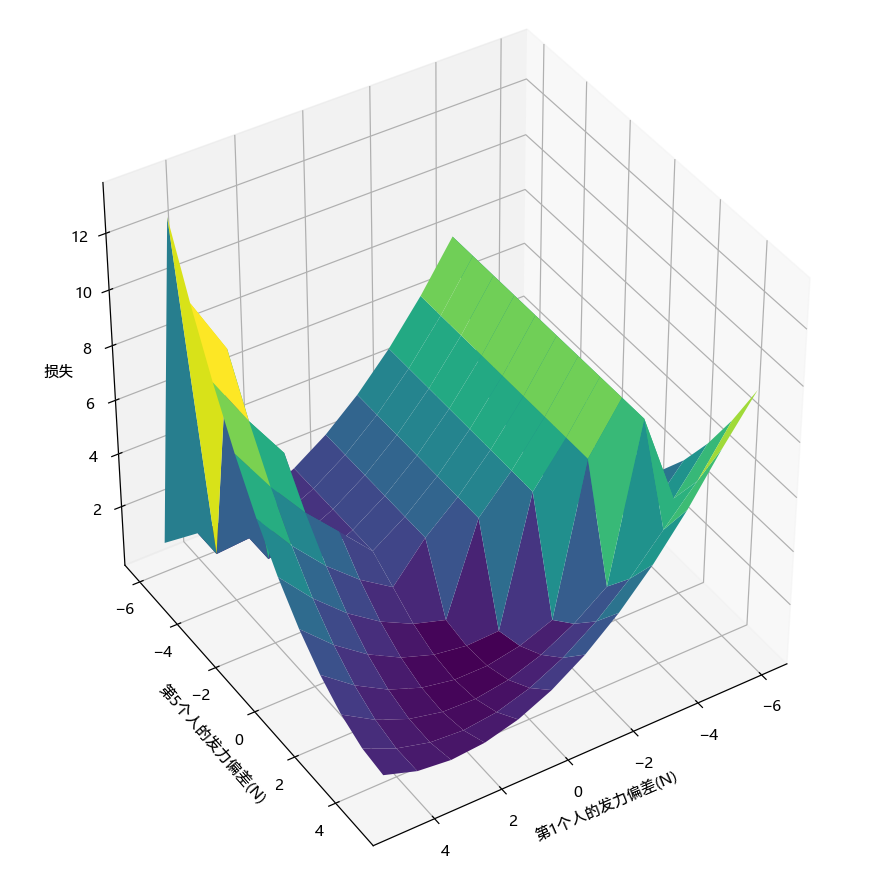

In [8]:
%matplotlib notebook
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.set_xlabel("第1个人的发力偏差(N)")
ax.set_ylabel("第5个人的发力偏差(N)")
ax.set_zlabel("损失")

ax.plot_surface(X, Y, Z,
                rstride=1,
                cstride=1,
                cmap=plt.get_cmap('viridis'))
